# Analyzing benchmarks of EARM 1.0 PySB model with microbench

## Background

[PySB](https://pysb.org) is a biochemical modeling framework for Python. Here, we analyze data from running simulations of a model ([Extrinsic apoptosis reaction model version 1.0](https://github.com/pysb/pysb/blob/master/pysb/examples/run_earm_1_0.py)) using an ODE integrator from the SciPy library. We examine the runtime across two different functions, and check that the environment (packages and their versions) are consistent across all runs, for reproducibility purposes.

## Load the data

In [1]:
%matplotlib inline

In [2]:
import pandas
import seaborn

In [3]:
# Show up to 200 rows in a dataframe
pandas.set_option('display.max_rows', 200)

In [4]:
results = pandas.read_json('microbench-pysb.json', lines=True)

## Calculate mean runtime by function

In [5]:
# Calculate runtime for each run
results['runtime'] = results['finish_time'] - results['start_time']

# Average runtime by function name
print(results.groupby('function_name')['runtime'].mean(numeric_only=False))

function_name
fig_4a   0 days 00:00:02.937925758
fig_4b   0 days 00:00:00.199696118
Name: runtime, dtype: timedelta64[ns]


## Show mean runtime as a boxplot with whiskers

<AxesSubplot:xlabel='function_name', ylabel='runtime'>

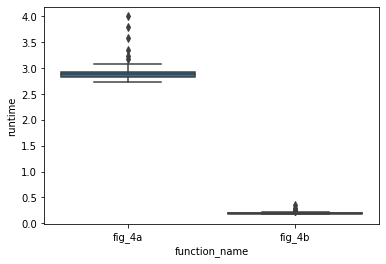

In [6]:
seaborn.boxplot(x=results['function_name'], y=results['runtime'].dt.total_seconds())

## Check conda environment consistency

We can quickly check if the conda environment was consistent across runs. We convert the conda_versions data (stored as dictionaries) to strings, and check that they're the same for every run:

In [7]:
len(results['conda_versions'].astype('str').unique()) == 1

False

We can also convert the package versions from a single run into a pandas dataframe:

In [8]:
pandas.DataFrame.from_dict(results['conda_versions'][0], orient='index', columns=['Version'])

,Version
alabaster,0.7.12py36_0
appdirs,1.4.4pypi_0
appnope,0.1.0py36hf537a9a_0
asn1crypto,1.3.0py36_0
asv,0.4.2pypi_0
atomizer,1.00
attrs,20.3.0pypi_0
babel,2.8.0py_0
backcall,0.1.0py36_0
bionetgen,2.5.21


Microbench provides a function, `envdiff`, to compare two environments together in a Jupyter Notebook, with differences highlighted in red (scroll to bottom in the following example). 

In [9]:
from microbench import envdiff
envdiff(results.iloc[0], results.iloc[1])

## Discussion
The above examples show how multiple functions can be benchmarked using microbench, and how different types of metadata can be captured. Microbench aims to make metadata capture easy, so that it can be collected routinely and used later if required for debugging, identifying reproducibility issues, and benchmarking.